## $\textit{Computational Astrophysics Final Project}$

## $\textit{Xola Ndaliso (NDLXOL020)}$

### $\textit{3.1.1. Milky Way evolution}$

In [16]:
import numpy as np
import pylab as pl
from astropy.io import fits
import variables as v      #importing a script with all the parameters
import functions as f      #importing a script with all the functions

Mg_0 = v.Mg_0
Mst_0 = v.Mst_0
Zg_0 = v.Zg_0*v.Z_sun
Mzg_0 = Zg_0*Mg_0   #from the definition of the gas phase metallicity
Mzst_0 = 0

#reading all parameters calculated from the Breathing box model

t = np.array(f.B_box_model(Mg_0, Mzg_0, Mst_0, Mzst_0, Zg_0)[0]) #reading the time
SFR = np.array(f.B_box_model(Mg_0, Mzg_0, Mst_0, Mzst_0, Zg_0)[1])   #reading the star formation rate
M_gas = np.array(f.B_box_model(Mg_0, Mzg_0, Mst_0, Mzst_0, Zg_0)[2]) #reading the gas masses
Z_g = np.array(f.B_box_model(Mg_0, Mzg_0, Mst_0, Mzst_0, Zg_0)[3])   #reading gas metallicities
M_st = np.array(f.B_box_model(Mg_0, Mzg_0, Mst_0, Mzst_0, Zg_0)[4])  #reading stellar masses
Z_st = np.array(f.B_box_model(Mg_0, Mzg_0, Mst_0, Mzst_0, Zg_0)[5])   #reading stellar metallicities
M_zg = np.array(f.B_box_model(Mg_0, Mzg_0, Mst_0, Mzst_0, Zg_0)[6])   #reading metal mass in the gas
M_zst = np.array(f.B_box_model(Mg_0, Mzg_0, Mst_0, Mzst_0, Zg_0)[7])  #reading metal mass in the stars

In [29]:
a = 1e+8     #initial guesses
b = 1e+15
Mst = M_st[0][-1]  #total stellar mass at final timestep

#iterating to approximate DM halo mass through Bisection Method

while True:    #infinite loop, stop when the difference is 0
    
    c = (a + b)/2
    
    if f.M_halo(Mst, c) == 0.:
        print('M_halo = %.4e' %c)
        break
    
    if f.M_halo(Mst, a)*f.M_halo(Mst, c) < 0:
        #print('%.3e' %M_halo(c))   #keeping track of the difference of Mst to the relation
        b = c
    
    if f.M_halo(Mst, b)*f.M_halo(Mst, c) < 0:
        #print('%.3e' %M_halo(c))  #keeping track of the difference of Mst from the relation
        a = c

M_halo = 7.6634e+11


In [30]:
Mg = M_gas[-1]
M_halo = 7.6634e+11  
M_baryon = Mg + Mst    #total baryonic mass is Mgas + Mstar
M_tot = M_baryon + M_halo    #total mass is total baryonic mass + halo mass

f_b = M_baryon/M_tot    #baryon fraction of MW
fg_s = Mg/Mst           #gas-to-stellar mass ratio
print('Baryon fraction = %.3f' %f_b)
print('Gas-to-stellar ratio = %.3f' %fg_s)

Baryon fraction = 0.041
Gas-to-stellar ratio = 0.150


### $\textit{3.1.2. Merging two galaxies}$

In [31]:
Mst = M_st[0][-1]  #total stellar mass at final timestep
Mg = M_gas[-1]
Mzg, Mzst = M_zg[-1], M_zst[-1]
M_halo = 7.6634e+11
M_baryon = Mg + Mst
M_tot = M_baryon + M_halo

f_b = M_baryon/M_tot    #baryon fraction of MW
fg_s = Mg/Mst 

#since the galaxies are MW like, the total stellar mass is just 2 times that of MW
#this will apply to other masses as well

######Just before the Starburst###############

Mg_mrg = 2*Mg       #total gas mass of the two merging galaxies
Mzg_mrg = 2*Mzg
Mzst_mrg = 2*Mzst
Ms_mrg = 2*Mst               #total stellar mass of the two merging galaxies
Zg_mrg = Mzg_mrg/Mg_mrg
Zs_mrg = Mzst_mrg/Ms_mrg

Mb_1 = Mg + Mst         #total baryon mass of one galaxy
Mb_2 = Mg + Mst          #total baryonic mass of the second galaxy

Mst_burst = v.alpha_bst*(Mg + Mg)*(Mb_1/Mb_2)**v.beta_bst   #total mass of star formed in the starburt

Ms_mrg += (1 - v.R)*Mst_burst    #total stellar mass after the merger
print('Ms_merged = %.3e'%Ms_mrg, 'Msun')
Mg_mrg += -(1 - v.R)*Mst_burst
Mzg_mrg += (-Zg_mrg + v.yz_prime)*Mst_burst
Mzst_mrg += (Zg_mrg - Zg_mrg*v.R)*Mst_burst
Zs_mrg = Mzst_mrg/Ms_mrg

###Outflows
Mg_mrg += -v.alpha*Mst_burst
Mzg_mrg += -v.alpha*Zg_mrg*Mst_burst

Zg_mrg = Mzg_mrg/Mg_mrg

print('Mgas_merger = %.3e' %Mg_mrg, 'Msun')


M_acc = ((v.f_bh)*(Mg_mrg)*(Mb_1/Mb_2))/(1 + (v.v_bh/v.vir)**2)  #mass accreted in a merger event

M_BH = 2*(4.2e+6)
M_SMBH = M_BH + M_acc
print('M_SMBH = %.3e' %M_SMBH, 'Msun')
print('Mst_busrt = %.3e' %Mst_burst, 'Msun')
print('Zst_mergr = %.3f' %Zs_mrg)
print('Zg_merger = %.3f' %Zg_mrg)
print('SFR_burst = %.2f' %(Mst_burst/100e+6), 'Msun/yr')

Ms_merged = 5.922e+10 Msun
Mgas_merger = 2.914e+09 Msun
M_SMBH = 2.588e+07 Msun
Mst_busrt = 4.732e+09 Msun
Zst_mergr = 0.013
Zg_merger = 0.039
SFR_burst = 47.32 Msun/yr


### $\textit{Calculating the M$_{halo}$ of the merger}$

In [32]:
a = 1e+8     #initial guesses
b = 1e+15
Mst = Ms_mrg  #total stellar mass at final timestep

#iterating to approximate DM halo mass through Bisection Method

for i in range(65):    #first monitered for an ifinite loop, there's convergence
    
    c = (a + b)/2
    
    if f.M_halo(Mst, c) == 0.:
        print('M_halo = %.4e' %c)
        break
    
    if f.M_halo(Mst, a)*f.M_halo(Mst, c) < 0:
        #print('%.3e' %f.M_halo(Mst, c))   #keeping track of the difference of Mst to the relation
        b = c
    
    if f.M_halo(Mst, b)*f.M_halo(Mst, c) < 0:
        #print('%.3e' %f.M_halo(Mst, c))  #keeping track of the difference of Mst from the relation
        a = c
M_halo_mrg = c

fb_mrg = (Ms_mrg + Mg_mrg)/(Ms_mrg + Mg_mrg + M_halo_mrg)  #baryon fraction afte merging
fg_s_mrg = Mg_mrg/Ms_mrg   

print('Merger baryon fraction = %.3f' %(fb_mrg))
print('Merge gas-to-stellar mass ratio = %.3f' %fg_s_mrg)
print('Merger M_halo = %.3e' %M_halo_mrg)

Merger baryon fraction = 0.021
Merge gas-to-stellar mass ratio = 0.049
Merger M_halo = 2.934e+12


## $\textit{3.2. Simulations}$

### $\textit{Isolated}$

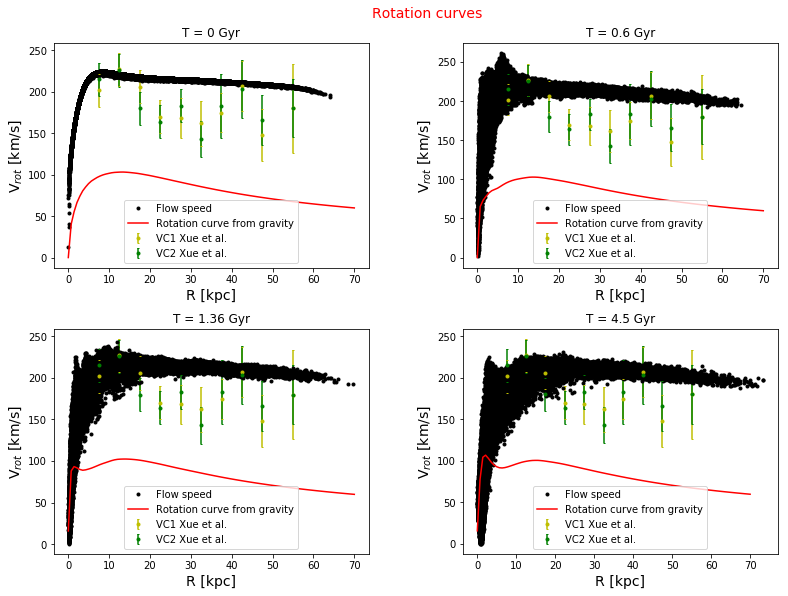

In [33]:
#calculating rotation curve of the gas particles 
from pygadgetreader import *

code, T = ['000', '060','136', '450'], [0, 0.6, 1.36, 4.5]
R = np.linspace(0.01, 70, 100)   #dummy array of radius
Xue = np.loadtxt('Xue2008_RC.txt', skiprows = 1)


##Plotting the Rotation curve
for i in range(4):
    
    vel = readsnap('Isolated/snapshot_'+str(code[i]), 'vel', 'gas', units = 1, suppress = 1)  #velocities of gas particles
    pos  = readsnap('Isolated/snapshot_'+str(code[i]), 'pos', 'gas', units = 1, suppress = 1)  #positions of the gass particles
    mass = readsnap('Isolated/snapshot_'+str(code[i]), 'mass', 'gas', units = 1, suppress = 1)  #gass mass

    v_rot = np.sqrt(vel[:,0]**2 + vel[:,1]**2)   #flow speed of gas particles
    r_p = np.sqrt(pos[:,0]**2 + pos[:,1]**2)     #planar radius
    M = []                                      #empty list for total masses within some radius
    for j in range(len(R)):
        idx = np.where(r_p <= R[j])              
        M.append(sum(mass[idx]))                #total gas mass within radius[j]

    v_sq = ((6.67408e-11)*np.array(M)*2.0e+31)/(R*(3.086e+19))           #V**2 = GM/R - centrifugal force = Gravity approx
    pl.subplot(220 + i + 1, title = 'T = ' + str(T[i])+ ' ' + 'Gyr')
    pl.plot(r_p, v_rot, 'k.', label = 'Flow speed')                 #plotting flow speed of gas particles
    pl.plot(R, np.sqrt(v_sq)/1000, 'r-', label = 'Rotation curve from gravity')#plotting rotation curve 
                                                                                    #expected from Gravity  
    pl.errorbar(Xue[:,0], Xue[:,1], yerr = Xue[:,2], fmt = 'y.', capsize = 0.75, label = 'VC1 Xue et al.')
    pl.errorbar(Xue[:,0], Xue[:,3], yerr = Xue[:, 4], fmt = 'g.', capsize = 0.75, label = 'VC2 Xue et al.')
    pl.xlabel('R [kpc]', fontsize = 14)
    pl.ylabel('V$_{rot}$ [km/s]', fontsize = 14)
    pl.legend()
pl.suptitle('Rotation curves',x = 0.99, y = 2., ha = 'center', 
            va = 'center', color = 'r', fontsize = 14)
pl.subplots_adjust(right = 1.8, top = 1.9, hspace = 0.27, wspace = 0.3)
pl.show()

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


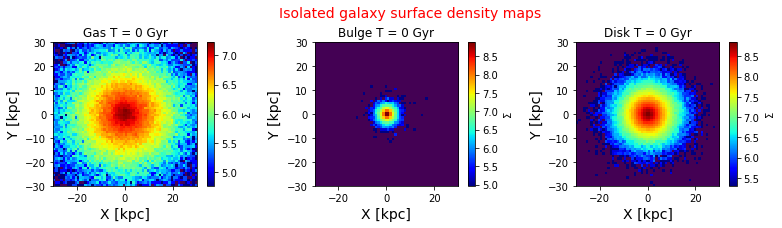

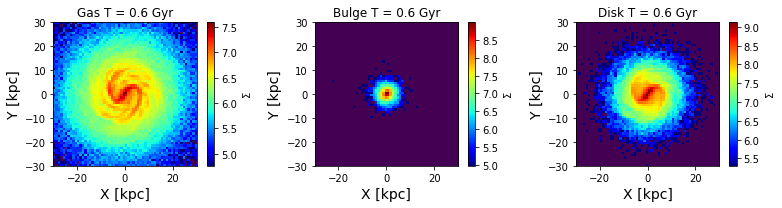

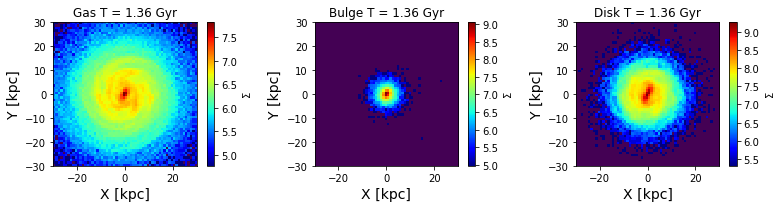

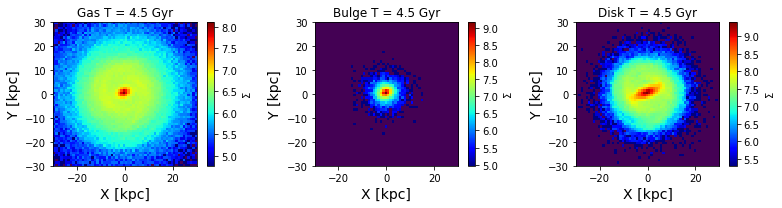

In [34]:
code, T = ['000', '060','136', '450'], [0, 0.6, 1.36, 4.5]
particles = ['gas', 'dm', 'disk']  #i.e dm = bulge
pl.suptitle('Isolated galaxy surface density maps',x = 0.99, y = 2., ha = 'center', 
            va = 'center', color = 'r', fontsize = 14)
compnts = ['Gas', 'Bulge', 'Disk']
for i in range(4):
    
    for j in range(3):
        pos = readsnap('Isolated/snapshot_'+str(code[i]), 'pos', str(particles[j]), suppress = 1)
        mass = readsnap('Isolated/snapshot_'+str(code[i]), 'mass', str(particles[j]), suppress = 1, units = 1)
    
        pl.subplot(330 + j + 1, title = str(compnts[j]) + ' '+ 'T = ' + str(T[i])+ ' ' + 'Gyr')
        hist = pl.hist2d(pos[:,0], pos[:,1], range = [[-30, 30], [-30, 30]], bins = 60, weights = mass)
        d = hist[2][1:] - hist[1][:-1]
        pl.imshow(np.log10(hist[0]/d), extent = (-30, 30 ,-30, 30), cmap = 'jet')
        pl.colorbar(label = '$\Sigma$')    
        pl.ylabel('Y [kpc]', fontsize = 14)
        pl.xlabel('X [kpc]', fontsize = 14)

    pl.subplots_adjust(right = 1.8, top = 1.9, hspace = 0.28, wspace = 0.3)
    pl.show()


### $\textit{Interacting}$

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


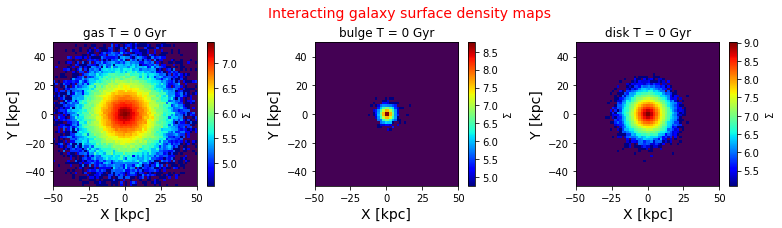

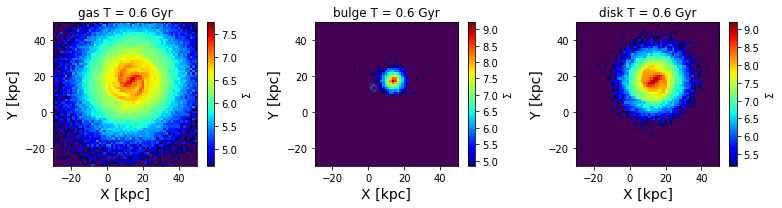

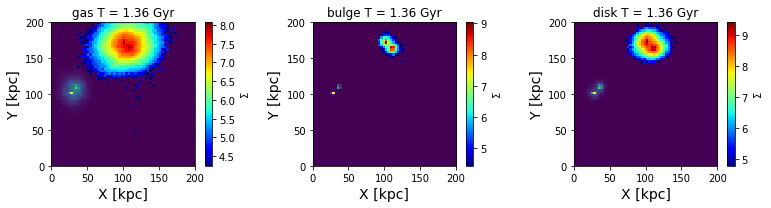

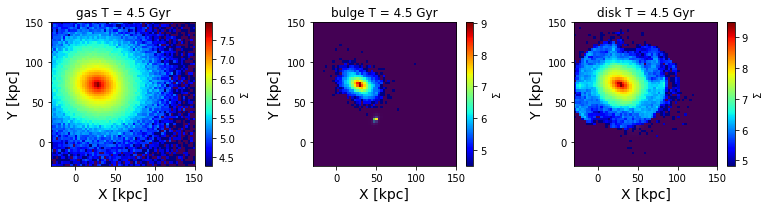

In [35]:
code, T = ['000', '060','136', '450'], [0, 0.6, 1.36, 4.5]
#ranges to zoom into the image.
limits = [[[-50, 50], [-50, 50]], [[-30, 50], [-30, 50]], [[0, 200], [0, 200]], [[-30, 150], [-30, 150]]] 
extents = [(-50, 50, -50, 50), (-30, 50, -30, 50), (0, 200, 0, 200), (-30, 150, -30, 150)]  #for setting tHe image
particles = ['gas', 'bulge', 'disk']  

pl.suptitle('Interacting galaxy surface density maps',x = 0.99, y = 2., ha = 'center', 
            va = 'center', color = 'r', fontsize = 14)


for i in range(4):

    for j in range(3):
        pos = readsnap('Interacting/snapshot_'+str(code[i]), 'pos', str(particles[j]), suppress = 1, units = 1)
        mass = readsnap('Interacting/snapshot_'+str(code[i]), 'mass', str(particles[j]), suppress = 1, units = 1)
    
        pl.subplot(330 + j + 1, title = str(particles[j]) + ' '+ 'T = ' + str(T[i])+ ' ' + 'Gyr')
        hist = pl.hist2d(pos[:,0], pos[:,1], range = limits[i], bins = 60, weights = mass)
        #nan = np.where(hist[0] == 0.)
        #hist[0][nan] = np.nan
        d = hist[2][1:] - hist[1][:-1]
        pl.imshow(np.log10(hist[0]/d), extent = extents[i], cmap = 'jet')
        pl.colorbar(label = '$\Sigma$')    
        pl.ylabel('Y [kpc]', fontsize = 14)
        pl.xlabel('X [kpc]', fontsize = 14)

    pl.subplots_adjust(right = 1.8, top = 1.9, hspace = 0.28, wspace = 0.3)
    pl.show()

In [36]:
#separating unbound from bound particles

particles = ['gas', 'bulge', 'disk', 'dm']     #particles of interest to check for bound and unbound
tot_masses, tot_mass_ubnd = [], []                    #empty list for total masses of each bound particles

for i in range(len(particles)):
    #reading all the properties of interest for each particle
    mass = readsnap('Interacting/snapshot_450', 'mass', str(particles[i]), suppress = 1) 
    vel = readsnap('Interacting/snapshot_450', 'vel', str(particles[i]), suppress = 1)
    pos = readsnap('Interacting/snapshot_450', 'pos', str(particles[i]), suppress = 1)
 
    COM_x = sum(mass*pos[:,0])/sum(mass)         #computing the center of mass to scale position of each particle
    COM_y = sum(mass*pos[:,1])/sum(mass)

    R = np.sqrt((pos[:,0] - COM_x)**2 + (pos[:,1] - COM_y)**2)  #distance of each particle relative to COM

    COV_x = sum(mass*vel[:,0])/sum(mass)        #computing the center of velocity 
    COV_y = sum(mass*vel[:,1])/sum(mass)

    V = np.sqrt((vel[:,0] - COV_x)**2 + (vel[:,1] - COV_y)**2)  #velocity of each particle relative to COV

    KE = 0.5*mass*(V**2)
    U = -(sum(mass)*mass)/R
    E_g = KE + U                                            #sum of the kinetic energy and potential energy 
    bound = np.where(E_g < 0)                               #checking for bound particles
    mass_bound = mass[bound]                                #masses for bound particles 
    mass_unbound = mass[np.where(E_g > 0)]
    tot_masses.append(sum(mass_bound))
    tot_mass_ubnd.append(sum(mass_unbound))

Mg_bound, Ms_bound = tot_masses[0], tot_masses[1] + tot_masses[2]   #stellar mass is the sum of disk and bulge mass
Mhalo_bound = tot_masses[3]                                         #total mass of the bound halo particles

fb_bound = (Mg_bound + Ms_bound)/(Mg_bound + Ms_bound + Mhalo_bound)  #baryon fraction of the bound particles
fg_s_bound = Mg_bound/Ms_bound                                        #gas to stellar fraction for bound particles

lost_mat = sum(tot_mass_ubnd)/(sum(mass_unbound) + sum(mass_bound))  #calculating the aomunt of lost material

print('Baryon_frac_bound = %.3f'  %(fb_bound)) 
print('Gas-to-stellar_ratio = %.3f' %fg_s_bound)                
print('Lost_fraction = %.3f' %lost_mat)

Baryon_frac_bound = 0.016
Gas-to-stellar_ratio = 0.209
Lost_fraction = 1.040


## $\textit{3.3. Comparing model & observations}$

### $\textit{3.3.1. The breathing box before merger}$

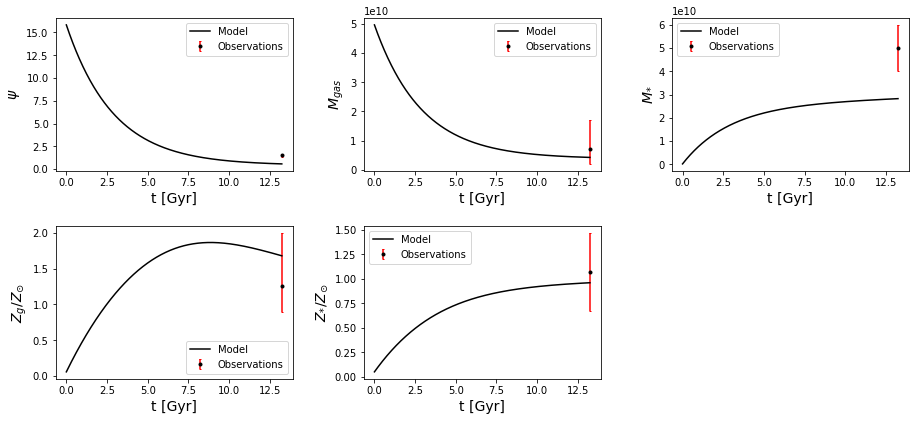

In [37]:
properties_obs, properties_err = [v.SFR_obs, v.Mg_obs, v.Ms_obs, v.Zg_obs, v.Zs_obs], [v.SFR_err, v.Mg_err, v.Ms_err,
                                                                                       v.Zg_err, v.Zs_err]
properties, labels = [SFR, M_gas, M_st[0], Z_g/v.Z_sun, Z_st/v.Z_sun], ['$\psi$', '$M_{gas}$', '$M_{*}$', 
                                                                        '$Z_g/Z_{\odot}$', '$Z_{*}/Z_{\odot}$']

for i, prop in enumerate(properties):
    
    pl.subplot(330 + i + 1)
    pl.plot(t, prop, 'k-', label = 'Model')   #plotting each property of the MW galaxy from the model
    pl.errorbar(t[-1], properties_obs[i], yerr = properties_err[i], fmt = 'k.', ecolor = 'r', capsize = 0.7, 
                label = 'Observations')  #plotting the real data of the MW galaxy
    pl.xlabel('t [Gyr]', fontsize = 14)
    pl.ylabel(str(labels[i]), fontsize = 14)
    pl.legend()
pl.subplots_adjust(right = 2.1, top = 2.1, hspace = 0.36, wspace = 0.3)
pl.show()

/home/xoks/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


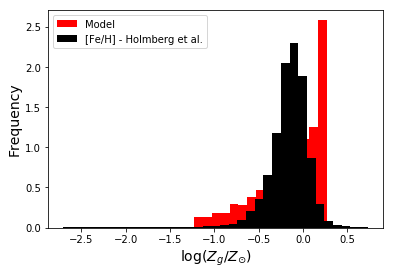

In [38]:
Fe_H = fits.open('Holmberg_FeH_MWdisk_data.fit')   #reading [Fe/H] data

Fe_H_data = Fe_H[1].data['Fe_H']    #specifying the data 
Fe_H_data[np.isnan(Fe_H_data)], Fe_H_data[np.isinf(Fe_H_data)] = 0, 0  #accounting for the nan values in the obs

#plotting the histogram log(Zg/Zsol) distribution from the model
pl.hist(np.log10(Z_g/v.Z_sun), bins = 15, color = 'r', weights = M_st[1], normed = True, label = 'Model')
pl.hist(Fe_H_data, bins = 35, normed = True, color = 'k', label = '[Fe/H] - Holmberg et al.')
pl.xlabel('$\log(Z_g/Z_{\odot})$', fontsize = 14)
pl.ylabel('Frequency', fontsize = 14)
pl.legend()
pl.savefig('Histogram.eps', format = 'eps', dpi = 150)
pl.show()

### $\textit{Bayesian}$

M_halo_post = 1.033e+12


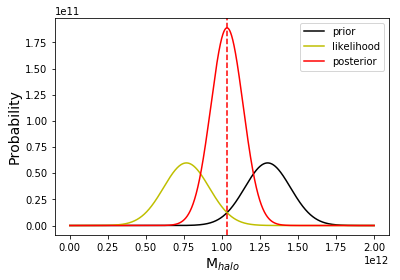

fb_post = 0.055


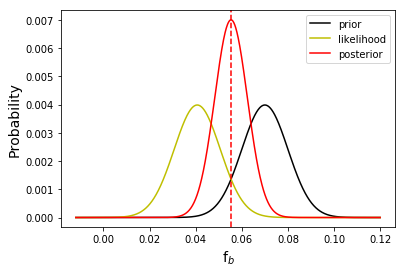

fg_s_post = 0.136


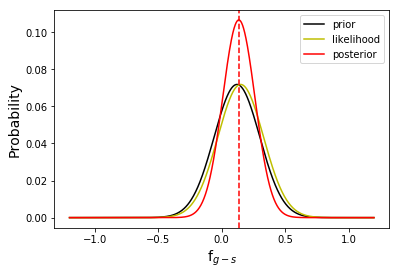

In [39]:
####Dark Matter Halo mass_M_halo probability
x_halo = np.linspace(0, 2.0e+12, 10000) #an array of halo Masses

dx = x_halo[1]-x_halo[0]                #difference in successive values of Mass array
L_halo = f.Likelihood(x_halo, 7.663e+11, 1.5e+11)  #calculating the likelihood
prior_halo = f.prior(x_halo, 1.3e+12, 1.5e+11)     #calculating prior
posterior_halo = L_halo*prior_halo                 #computing the posterior 
max_post = np.where(posterior_halo == max(posterior_halo))   #maximum posterior
print('M_halo_post = %.3e' %(x_halo[max_post][0]))         #Halo mass corresponding to max posterior

pl.plot(x_halo, prior_halo, 'k-' ,label = 'prior')    #plotting 
pl.plot(x_halo, L_halo, 'y-',label = 'likelihood')
pl.plot(x_halo, posterior_halo/(4*dx),'r-', label = 'posterior')
pl.axvline(x_halo[max_post], color = 'r', ls = '--')
pl.xlabel('M$_{halo}$', fontsize = 14)
pl.ylabel('Probability', fontsize = 14)
pl.legend()
pl.savefig('bayes_Mhalo.eps', format = 'eps', dpi = 100)
pl.show()

###Baryon fraction_fb
x_fb = np.linspace(-0.012, 0.12, 1000)
dx = x_fb[1]-x_fb[0]

prior_fb = f.prior(x_fb, v.fb_obs, v.f_b_err)             #difference in successive values of Mass array
L_fb = f.Likelihood(x_fb, f_b, v.f_b_err)                #calculating the likelihood
posterior_fb = L_fb*prior_fb                            #calculating posterior 
max_post = np.where(posterior_fb == max(posterior_fb))
print('fb_post = %.3f' %(x_fb[max_post][0]))             #baryon fraction corresponding to max posterior

pl.plot(x_fb, prior_fb, 'k-', label = 'prior')
pl.plot(x_fb, L_fb, 'y-', label = 'likelihood')
pl.plot(x_fb, posterior_fb/(2*dx), 'r-' ,label = 'posterior')
pl.axvline(x_fb[max_post], color = 'r', ls = '--')
pl.xlabel('f$_b$', fontsize = 14)
pl.ylabel('Probability', fontsize = 14)
pl.legend()
pl.savefig('bayes_fb.eps', format = 'eps', dpi = 100)
pl.show()

####Gas-to-stellar mass ratios_fg_s

x_g_s = np.linspace(-1.2, 1.2, 1000)
dx = x_g_s[1] - x_g_s[0]

prior_fg_s = f.prior(x_g_s, v.fg_s_obs, v.fg_s_err)
L_fg_s = f.Likelihood(x_g_s, fg_s, v.fg_s_err)
posterior_fg_s = L_fg_s*prior_fg_s
max_post = np.where(posterior_fg_s == max(posterior_fg_s))
print('fg_s_post = %.3f' %(x_g_s[max_post][0]))
pl.plot(x_g_s, prior_fg_s, 'k-', label = 'prior')
pl.plot(x_g_s, L_fg_s, 'y-', label = 'likelihood')
pl.plot(x_g_s, posterior_fg_s/(20*dx), 'r-', label = 'posterior')
pl.axvline(x_g_s[max_post], color = 'r', ls = '--')
pl.xlabel('f$_{g-s}$', fontsize = 14)
pl.ylabel('Probability', fontsize = 14)
pl.legend()
pl.savefig('bayes_fg_s.eps', format = 'eps', dpi = 100)
pl.show()

### $\textit{3.3.2 The Breathing Box model after the merger}$

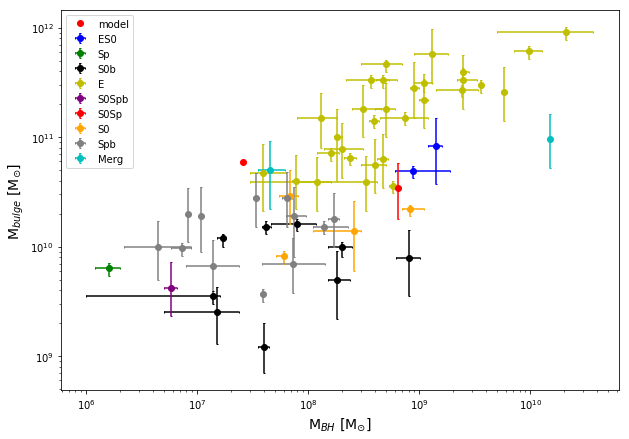

In [40]:
SFR_burst = Mst_burst/100e+6

Savo = fits.open('Savorgnan+16_BH_data.fits')

data = Savo[1].data

data_type = set(data['TYPE'])   #taking only the unique elements
color = ['b', 'g', 'k', 'y', 'purple', 'r', 'orange', 'grey', 'c']

pl.figure(figsize = (10, 7))

for i in range(len(data_type)):
    gal_type = np.where(data['TYPE'] == list(data_type)[i])      #differentiating galaxy types
    
    err_BH, err_BLGE = np.ones((2, len(gal_type[0]))), np.ones((2, len(gal_type[0])))   #empty arrays for error
    
    MBH_up_err, MBH_lw_err = data['M_BHP'][gal_type], data['M_BHM'][gal_type]  #select MBH errors wrt galaxy types
    MBLGE_up_err, MBLGE_lw_err = data['M_BULGEP'][gal_type], data['M_BULGEM'][gal_type]  
    
    for j in range(len(err_BH[0])):       
        err_BH[0][j], err_BLGE[0][j] = MBH_lw_err[j], MBLGE_lw_err[j]    #filling empty array with upper and lower
        err_BH[1][j], err_BLGE[1][j] = MBH_up_err[j], MBLGE_up_err[j]    #errors to plot error bars!
        
    #plotting the MBH-M_bulge relation for all galaxy types
    pl.errorbar(data['M_BH'][gal_type], data['M_BULGE'][gal_type], xerr = err_BH, yerr = err_BLGE,
                c = color[i], fmt = 'o', capsize = 1.2, label = list(data_type)[i])
    pl.yscale('log')
    pl.xscale('log')
pl.plot(M_SMBH, Ms_mrg, c = 'r', ls = '', marker = 'o', label = 'model')  #the total stellar mass  in the bulge
pl.legend()
pl.xlabel('M$_{BH}$ [M$_{\odot}$]', fontsize = 14)
pl.ylabel('M$_{bulge}$ [M$_{\odot}$]', fontsize = 14)
pl.savefig('Merger_comp.eps', format = 'eps', dpi = 150)
pl.show()